In [275]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tvDatafeed import TvDatafeed, Interval
import mplfinance as mpf
import pandas as pd
import ta  # module for technical indicators
import ta.momentum
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [276]:
path = "../../data/reg_dataset.csv"
df = pd.read_csv(path)

In [277]:
data = df

features = data.drop(columns=['Target'])
target = data['Target']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

split_index = int(len(features_scaled) * 0.75)
X_train, X_test = features_scaled[:split_index], features_scaled[split_index:]
y_train, y_test = target[:split_index], target[split_index:]

In [278]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=500)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor MSE: {rf_mse}")

Random Forest Regressor MSE: 0.8804263537926985


In [279]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Regressor MSE: {xgb_mse}")

XGBoost Regressor MSE: 0.8304726623352271


In [280]:
print(f"Random Forest Predictions: {rf_predictions[:5]}")
print(f"XGBoost Predictions: {xgb_predictions[:5]}")

Random Forest Predictions: [-0.08475725  0.1414815   0.34028238 -0.0589626   0.09617219]
XGBoost Predictions: [ 0.06748203  0.24295601  0.21153107 -0.07852387 -0.01596914]


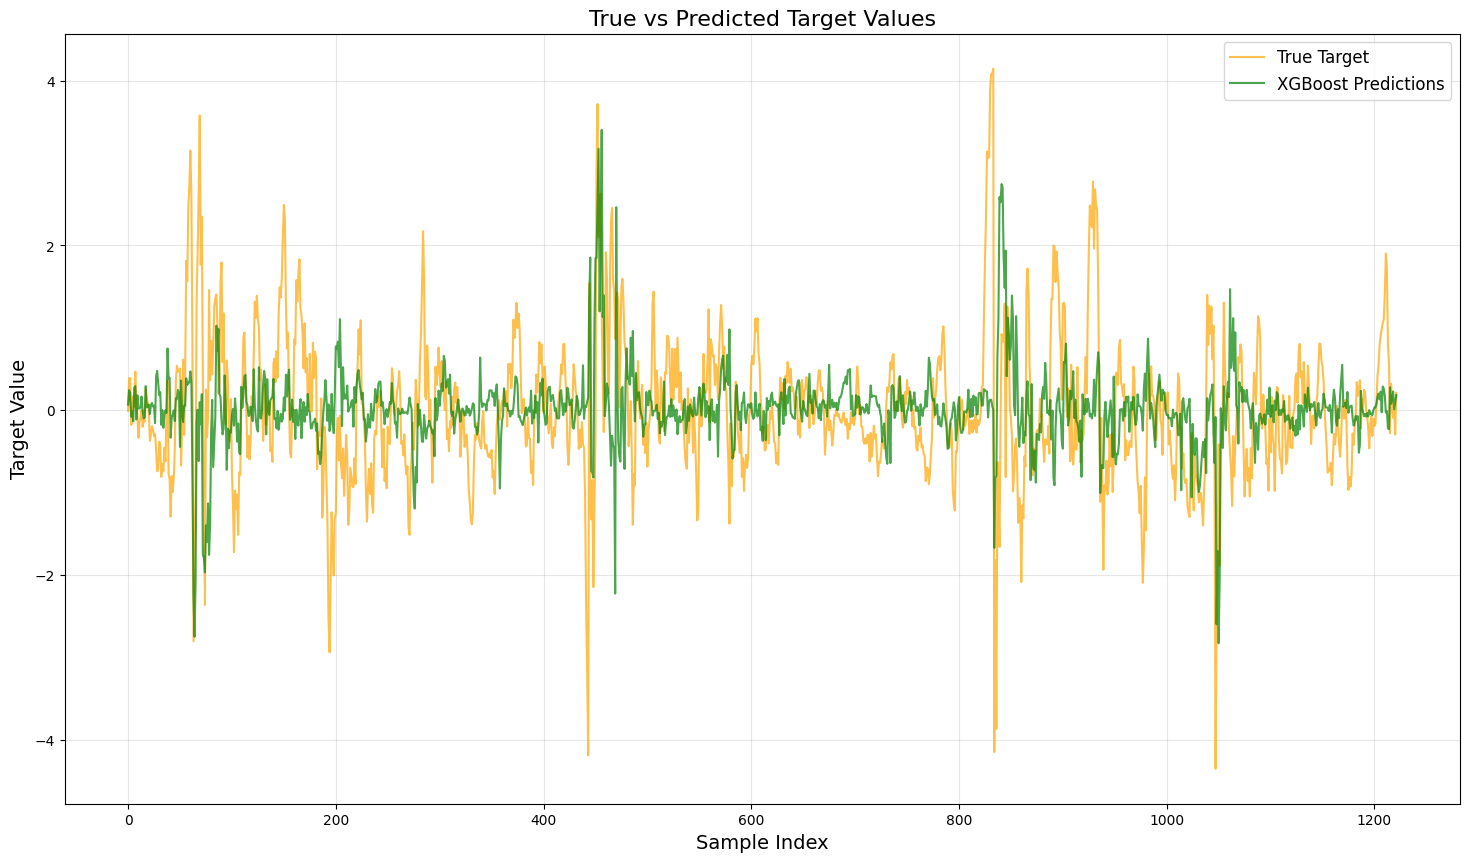

In [281]:
import matplotlib.pyplot as plt

# Ensure the inputs are properly aligned and in the same format
if hasattr(y_test, "values"):  # Handle pandas series
    y_test = y_test.values

if hasattr(xgb_predictions, "values"):  # Handle pandas series
    xgb_predictions = xgb_predictions.values

# Visualize Predictions
plt.figure(figsize=(18, 10))

# Plot true target values
plt.plot(range(len(y_test)), y_test, label="True Target", alpha=0.7, color='orange')

# Plot XGBoost predictions
plt.plot(range(len(xgb_predictions)), xgb_predictions, label="XGBoost Predictions",alpha=0.7, color='green')

# Title and labels
plt.title("True vs Predicted Target Values", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Target Value", fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()


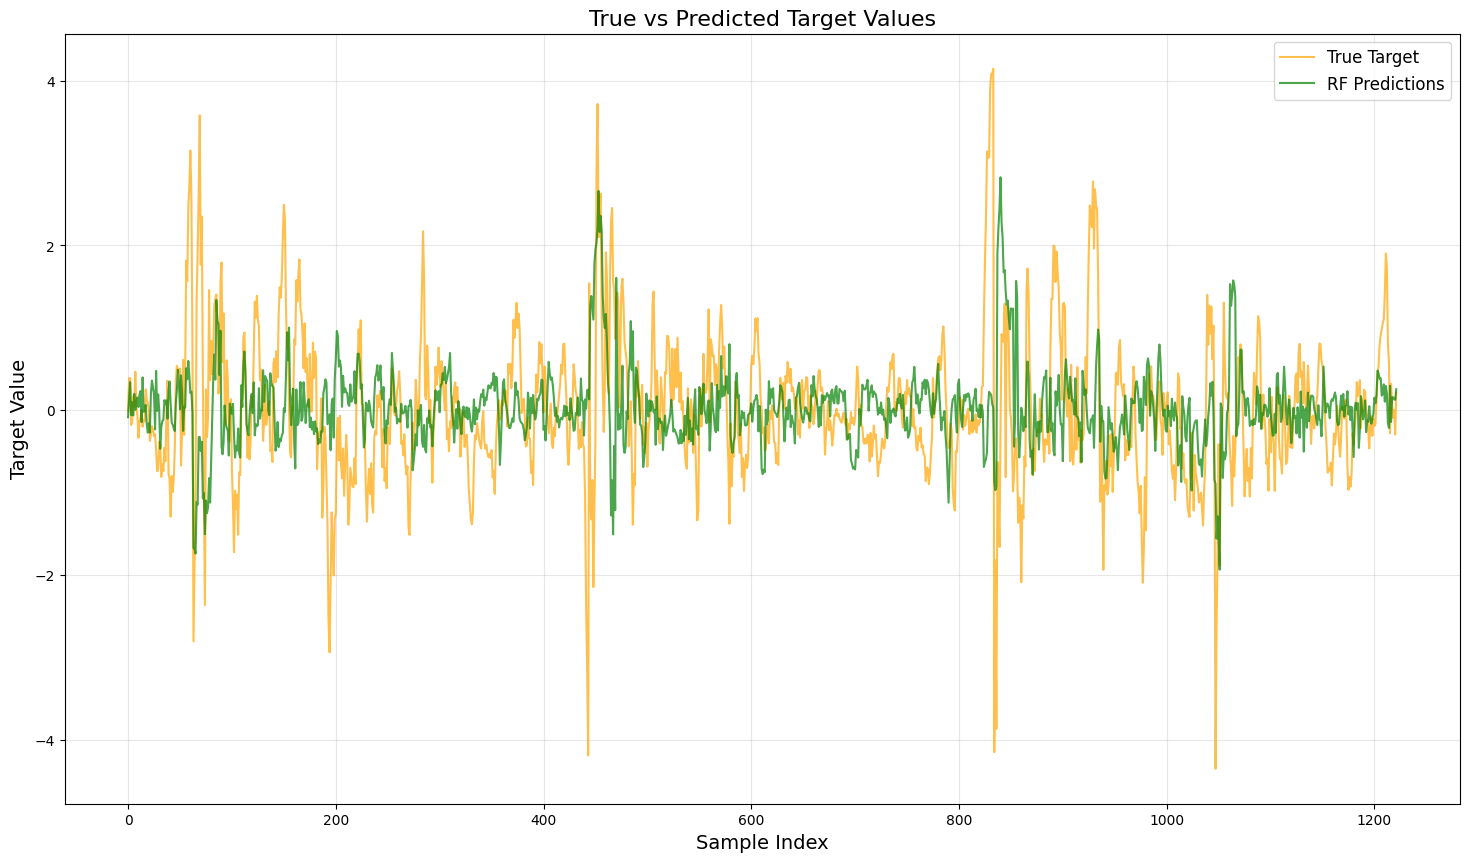

In [282]:
import matplotlib.pyplot as plt

# Ensure the inputs are properly aligned and in the same format
if hasattr(y_test, "values"):  # Handle pandas series
    y_test = y_test.values

if hasattr(rf_predictions, "values"):  # Handle pandas series
    rf_predictions = rf_predictions.values

# Visualize Predictions
plt.figure(figsize=(18, 10))

# Plot true target values
plt.plot(range(len(y_test)), y_test, label="True Target", alpha=0.7, color='orange')

# Plot XGBoost predictions
plt.plot(range(len(rf_predictions)), rf_predictions, label="RF Predictions", alpha=0.7, color='green')

# Title and labels
plt.title("True vs Predicted Target Values", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Target Value", fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()


In [283]:
from sklearn.metrics import r2_score
rf_r2 = r2_score(y_test, rf_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"Random Forest R2 Score: {rf_r2}")
print(f"XGBoost R2 Score: {xgb_r2}")


Random Forest R2 Score: -0.14559558524738536
XGBoost R2 Score: -0.08059670356470039


**LSTM:**

In [284]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming df is already loaded and processed as in the previous steps

# Features and Target
features = df.drop(columns=['Target'])
target = df['Target']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Prepare the data for LSTM: reshape it into 3D array (samples, time_steps, features)
n_time_steps = 5  # The number of time steps (previous periods you want to use for prediction)
n_features = features_scaled.shape[1]

X = []
y = []

# Create time windows (samples) for the LSTM model
for i in range(n_time_steps, len(features_scaled)):
    X.append(features_scaled[i - n_time_steps:i])  # Collect previous n_time_steps rows
    y.append(target.iloc[i])  # The target value (next period's return)

X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
split_index = int(len(X) * 0.75)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [285]:
# Building the LSTM model for regression
model = Sequential()

# Add the LSTM layers
model.add(LSTM(units=10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to avoid overfitting

model.add(LSTM(units=10, return_sequences=True))  # Second LSTM layer
model.add(Dropout(0.2))

model.add(LSTM(units=10, return_sequences=False))  # ThirdLSTM layer
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))  # No activation for regression (linear output)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


/home/pedro/python_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 5, 10)          │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 5, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 5, 10)          │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 5, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 10)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,331 (9.11 KB)

 Trainable params: 2,331 (9.11 KB)

 Non-trainable params: 0 (0.00 B)

In [286]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))


Epoch 1/50


458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.0968 - val_loss: 0.7868
Epoch 2/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.1279 - val_loss: 0.7914
Epoch 3/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0592 - val_loss: 0.8159
Epoch 4/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0444 - val_loss: 0.8218
Epoch 5/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0320 - val_loss: 0.8156
Epoch 6/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0564 - val_loss: 0.8228
Epoch 7/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0700 - val_loss: 0.8350
Epoch 8/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9955 - val_loss: 0.8233
Epoch 9/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0448 - val_loss: 0.8931
Epoch 10/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0241 - val_loss: 0.8544
Epoch 11/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9314 - val_loss: 0.8325
Epoch 12/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1331 
Test Loss (MSE): 0.9857714772224426
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Root Mean Squared Error (RMSE): 0.9928602296053283
R^2: -0.2816203505918109


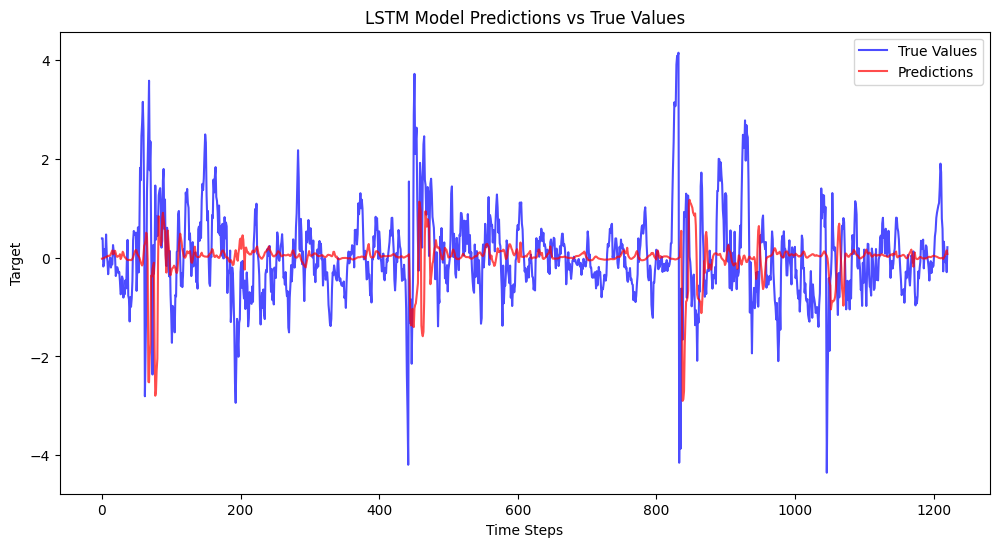

In [287]:
import matplotlib.pyplot as plt

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss}')

# Predictions
y_pred_lstm = model.predict(X_test)

# Obliczanie metryk
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2 = r2_score(y_test, y_pred_lstm)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2: {r2}')

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Prawdziwe wartości
plt.plot(y_test, label='True Values', color='blue', alpha=0.7)

# Przewidywania
plt.plot(y_pred_lstm, label='Predictions', color='red', alpha=0.7)

plt.title('LSTM Model Predictions vs True Values')
plt.xlabel('Time Steps')
plt.ylabel('Target')
plt.legend()
plt.show()


**GET AVERAGE FROM MODELS**

In [288]:
y_pred_lstm_flat = [item[0] for item in y_pred_lstm]
# Find the minimum length of the arrays
min_length = min(len(rf_predictions), len(xgb_predictions), len(y_pred_lstm_flat))

# Truncate all arrays to the same length
rf_predictions = rf_predictions[:min_length]
xgb_predictions = xgb_predictions[:min_length]
y_pred_lstm_flat = y_pred_lstm_flat[:min_length]
y_test = y_test[:min_length]  # If plotting or evaluation involves y_test

# Compute the averaged predictions
predictions = (rf_predictions + xgb_predictions + y_pred_lstm_flat) / 3

# Verify the result
print(predictions)


[-0.01282197  0.12168177  0.18007699 ...  0.16178386  0.09678062
  0.09973714]


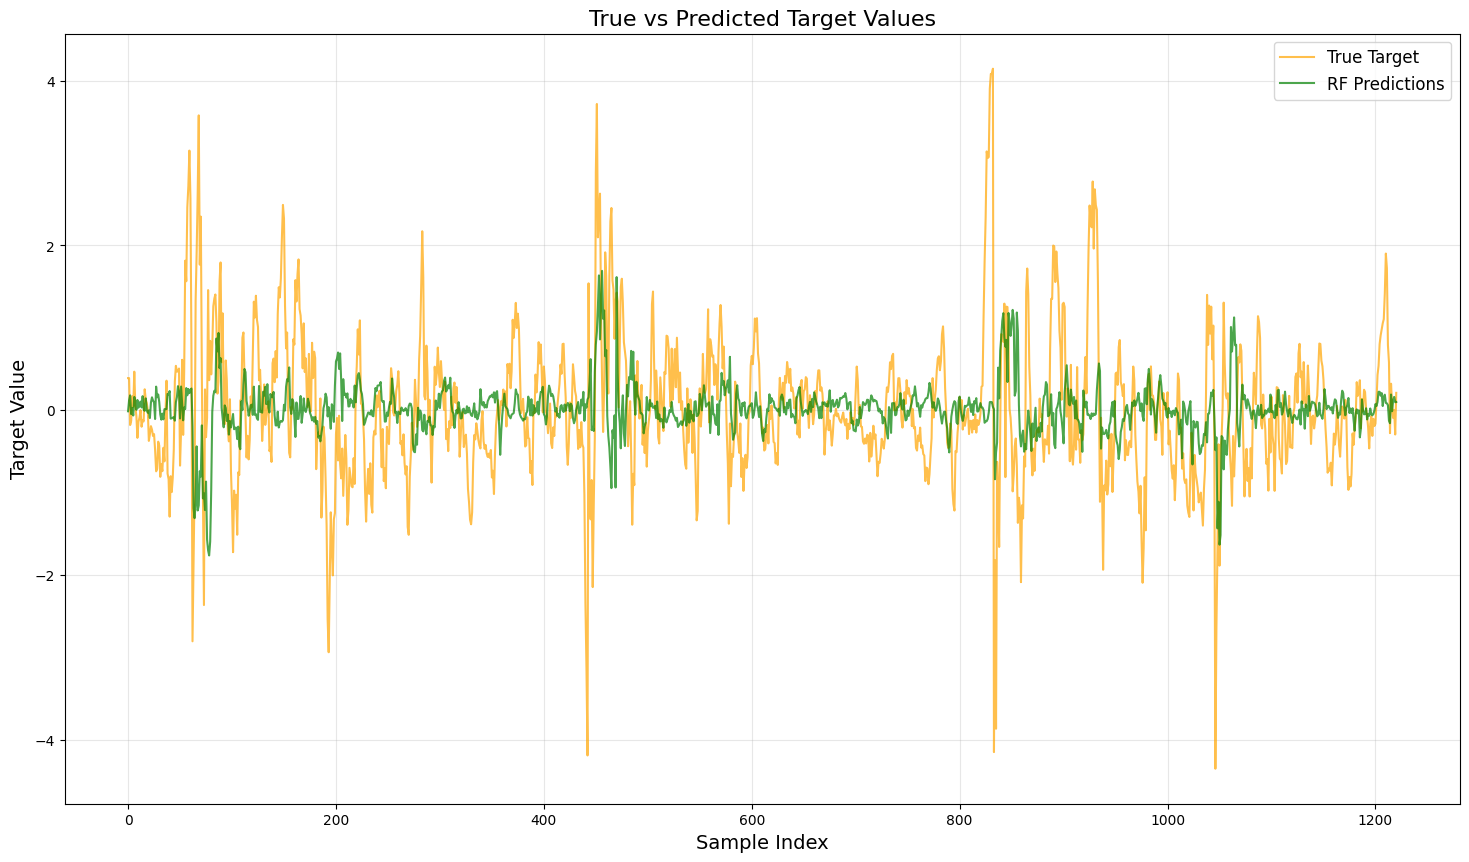

Root Mean Squared Error (RMSE): 0.9124300863625107
R^2: -0.08238648215097522


In [289]:
# Visualize Predictions
plt.figure(figsize=(18, 10))

# Plot true target values
plt.plot(range(len(y_test)), y_test, label="True Target", alpha=0.7, color='orange')

# Plot XGBoost predictions
plt.plot(range(len(predictions)), predictions, label="RF Predictions", alpha=0.7, color='green')

# Title and labels
plt.title("True vs Predicted Target Values", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Target Value", fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2: {r2}')


**FINAL PREDICTIONS**

In [291]:
predictions

array([-0.01282197,  0.12168177,  0.18007699, ...,  0.16178386,
        0.09678062,  0.09973714])